# Parameterization of the mean flux

The mean transmitted flux fraction, or mean flux, is one of the main nuisances in Lyman alpha analyses. In this notebook we discuss possible parameterizations of the mean flux, and choose priors for the parameters.

There are several parameterizations possible:
 - On one extreme, we could decide to have a free parameter $\bar{F}_i$ for each redshift bin, for a total of 10-12 parameters.
 - On the other extreme, we could describe it as a power law in effective optical depth
 - We will probably end up using something in between, like a low-order polynomial in log optical depth. 
 
In Pedersen et al. (2021, 2023) we used a fiducial model (from the "central sim") multiplied by a low-order polynomial around $z_\star = 3$:
$$ \ln \tau_{\rm eff}(z) = \ln \tau_{\rm fid}(z)  + a_\tau + b_\tau \ln \frac{1+z}{1+z_\star} $$

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from cup1d.nuisance import mean_flux_model

In [2]:
# construct two models for the mean flux, with different number of parameters
F_model_test=mean_flux_model.MeanFluxModel(ln_tau_coeff=[0.4,0,0])
F_model_fid=mean_flux_model.MeanFluxModel()

In [3]:
def mean_flux_Kamble2019(z):
    """Mean transmitted flux fraction from eBOSS data (Kamble et al. 2019)"""
    # unpublished work by Kamble et al., soon to appear on the archive
    tau = 0.0055*(1+z)**3.18
    return np.exp(-tau)

Text(0.5, 1.0, 'Effective optical depth')

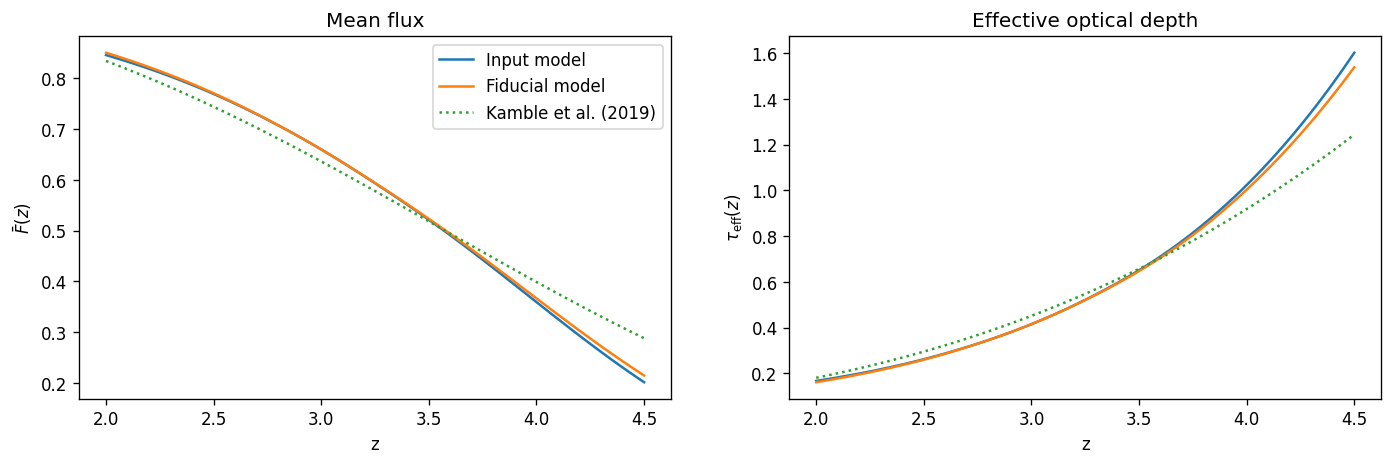

In [4]:
# plot mean flux and effective optical depth in both models, vs literature
z=np.linspace(2.0,4.5,100)
mf_K19=mean_flux_Kamble2019(z)
mf=F_model_test.get_mean_flux(z)
mf_fid=F_model_fid.get_mean_flux(z)

plt.figure(figsize=[14,4])
# start with mean flux
plt.subplot(1, 2, 1)
plt.plot(z,mf,label='Input model')
plt.plot(z,mf_fid,label='Fiducial model')
plt.plot(z,mf_K19,ls=':',label='Kamble et al. (2019)')
plt.xlabel('z')
plt.ylabel(r'$\bar{F}(z)$')
plt.title('Mean flux')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
plt.plot(z,-np.log(mf),label='Input model')
plt.plot(z,-np.log(mf_fid),label='Fiducial model')
plt.plot(z,-np.log(mf_K19),ls=':',label='Kamble et al. (2019)')
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z)$')
plt.title('Effective optical depth')
#plt.legend()

Text(0.5, 1.0, 'Effective optical depth')

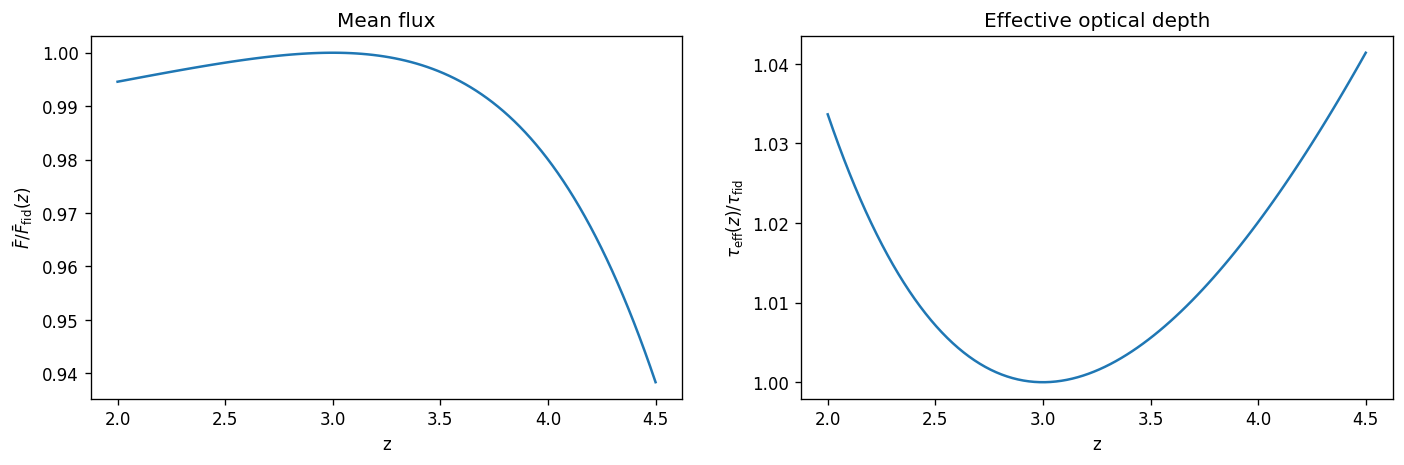

In [5]:
plt.figure(figsize=[14,4])
# start with mean flux
plt.subplot(1, 2, 1)
plt.plot(z,mf/mf_fid)
plt.xlabel('z')
plt.ylabel(r'$\bar{F} / \bar{F}_{\rm fid}(z)$')
plt.title('Mean flux')
# now effective optical depth
plt.subplot(1, 2, 2)
plt.plot(z,np.log(mf)/np.log(mf_fid))
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z) / \tau_{\rm fid}$')
plt.title('Effective optical depth')

Text(0.5, 1.0, 'Effective optical depth')

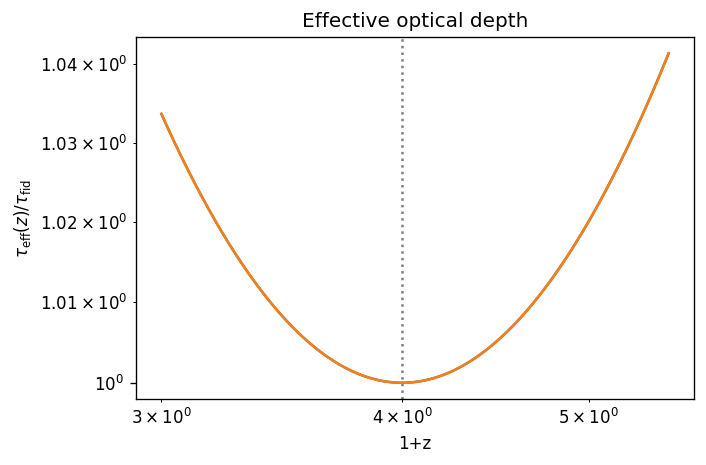

In [6]:
# plot mean flux and effective optical depth in both models
z=np.linspace(2.0,4.5,100)
plt.loglog(1+z,F_model_test.get_tau_eff(z)/F_model_fid.get_tau_eff(z))
plt.loglog(1+z,F_model_test.get_tau_eff(z)/F_model_test.fid_tau_interp(z))
plt.xlabel('1+z')
plt.ylabel(r'$\tau_{\rm eff}(z) / \tau_{\rm fid}$')
plt.axvline(x=4,ls=':',color='gray')
plt.title('Effective optical depth')